In [1]:
import os
import kernal_env_helper as keh

keh.python_version()
keh.which_python()
keh.pip_list()
keh.export_requirements()

Kernel Version of Python is Python 3.13.5

Python path: C:\Users\antho\python_envs\env_3_13_base\Scripts\python.exe
Package                 Version
----------------------- -----------
asttokens               3.0.0
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.2
cycler                  0.12.1
debugpy                 1.8.15
decorator               5.2.1
executing               2.2.0
fonttools               4.59.0
ipykernel               6.29.5
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.8
matplotlib              3.10.3
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numby                   0.2.0
numpy                   2.3.1
packaging               25.0
pandas                  2.3.1
parso                   0.8.4
pillow                  11.3.0
pip                     25.1.1

# Import

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.base import clone

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import root_mean_squared_error

import sys

## filter out warning to make sure output does not get to large
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    

# Import Custom Helper Module

In [3]:
#import supervised helper (must be located in same location as this ipynb file)
import supervised_helper as slh


# Load Data and View (Training Data)

In [4]:
#specify directory of data file (currently same directory as this python file)
data_dir = "./"       
data_file = 'stucco.csv'
#append file names, os.join ensures correct brackets / or \ when joining
full_file_name = os.path.join(data_dir, data_file)

# Load data
df = pd.read_csv(full_file_name)

# Data exploration
print(df.info())  # type of each variable
print(df.shape)  # How many rows and columns
print(df.columns)  # What are variable names
print(df.head())  # Show me a few lines
print(df.describe())
print(df.isna().sum())  # Any missing data/NA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   method      774 non-null    object 
 1   mixing      774 non-null    object 
 2   region      774 non-null    object 
 3   age         774 non-null    int64  
 4   cement      774 non-null    float64
 5   water       774 non-null    float64
 6   ash         774 non-null    float64
 7   slag        774 non-null    float64
 8   coarse      774 non-null    float64
 9   medium      774 non-null    int64  
 10  fine        774 non-null    int64  
 11  superfine   774 non-null    float64
 12  admixtures  774 non-null    float64
 13  additive1   774 non-null    int64  
 14  additive2   774 non-null    int64  
 15  additive3   774 non-null    float64
 16  additive4   774 non-null    int64  
 17  additive5   774 non-null    int64  
 18  strength    774 non-null    float64
dtypes: float64(9), int64(7), obje

# Load Test Data and Verify Test Data Matches Training Data (from Test CSV File)

In [5]:
#specify directory of data file (currently same directory as this python file)
data_dir = "./"       
data_file = 'stucco_test.csv'
#append file names, os.join ensures correct brackets / or \ when joining
full_file_name = os.path.join(data_dir, data_file)

# Load data
TEST = pd.read_csv(full_file_name) #df stands for dataframe

# Data exploration
print(TEST.info())  # type of each variable
print(TEST.shape)  # How many rows and columns?
print(TEST.isna().sum())  # Any missing data/NA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   method      192 non-null    object 
 1   mixing      192 non-null    object 
 2   region      192 non-null    object 
 3   age         192 non-null    int64  
 4   cement      192 non-null    float64
 5   water       192 non-null    float64
 6   ash         192 non-null    float64
 7   slag        192 non-null    float64
 8   coarse      192 non-null    float64
 9   medium      192 non-null    int64  
 10  fine        192 non-null    int64  
 11  superfine   192 non-null    float64
 12  admixtures  192 non-null    float64
 13  additive1   192 non-null    int64  
 14  additive2   192 non-null    int64  
 15  additive3   192 non-null    float64
 16  additive4   192 non-null    int64  
 17  additive5   192 non-null    int64  
dtypes: float64(8), int64(7), object(3)
memory usage: 27.1+ KB
None
(192, 1

# Plot Data

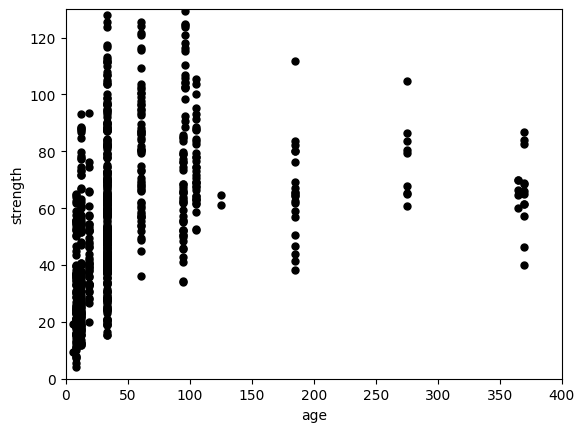

In [6]:
# Plotting
X_raw=df['age']
y_raw=df['strength']

plt.scatter(X_raw,y_raw, c='black', s=25, marker='o')
plt.xlabel('age')
plt.ylabel('strength')
plt.xlim(0,400)
plt.ylim(0,130)
plt.show()


# Define Response and Train/Test Split Data

In [7]:
#name of response variable
y_string = 'strength'

#to start all variables other than the response are options for predictions (X)
X = df.drop(columns=y_string)
y = df[y_string]

# Split data into training and validation sets
#random state is just an arbitrary integer to get the same results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=555)

#train values
print("Train data info")
print(X_train.shape)  # How many rows and columns
print(X_train.head())  # Show me a few lines
print("y train shape:", y_train.shape)
print("")
print("Test  data info")
print(X_test.shape)  # How many rows and columns
print(X_test.head())  # Show me a few lines
print("y test shape:", y_test.shape)


Train data info
(619, 18)
    method   mixing region  age  cement  water    ash    slag  coarse  medium  \
717      B     hand   west  105   171.4  162.4  940.2   14.04    6.44      98   
129      B    ready  north   12    39.6  201.6  818.4  121.69    0.00      75   
734      B    ready   west  185   193.3  190.6  979.8  145.12    0.00      17   
383      A  machine   west   33    77.3  173.8  935.0   81.96   11.19      21   
334      B  machine  north   33   184.1  190.1  962.3  130.25    0.00     105   

     fine  superfine  admixtures  additive1  additive2  additive3  additive4  \
717    29      78.16         8.7        357         23        0.3        194   
129    61     390.31        43.2        105         10        0.2         94   
734    59       0.00         7.5        280         55        0.9        211   
383    58     291.25        32.1        155         27        0.6        198   
334    22       0.00         3.1        156         26        0.6        165   

     a

# Preliminaries (Models, Scaling, Where to store results, and Scoring metrics)

In [8]:
#Linear regressopm
lin_reg = LinearRegression()

#initial tolerarance for the SFS algorith.  Can be tuned, but I chose not too.
tol = 0.01*y_train.mean()

#SFS Model
sfs = SequentialFeatureSelector(lin_reg, n_features_to_select='auto', scoring='neg_root_mean_squared_error',  tol=tol)

#elasticnet regression
ela_reg = ElasticNet(precompute=True, max_iter=2000, warm_start=True)

#elasticnet regression with cv to tune alpha and rho  
rho_list = [.05, .25, .5, .75, .95]
ela_cv =  ElasticNetCV(eps=1e-5, n_alphas=30, l1_ratio = rho_list,  max_iter=3000)

#KNN Model
#N_neighbors initially set, can tune later.
knn_reg=KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# Establish the rng for the random state used in advanced models
rng = np.random.RandomState(541)

#Cart Model
cart_reg =  tree.DecisionTreeRegressor(criterion='squared_error',splitter='best', random_state=rng)

#RandomForestRegressor. Will tune the hyperparameter later.
rf_reg =  RandomForestRegressor(n_estimators=200,  bootstrap=True, oob_score=True, max_features = 0.33, random_state=rng, n_jobs = -1)

#Gradient Boosting Regresor. Will tune the hpyerparameters later.
gbm_reg =  GradientBoostingRegressor(random_state=rng)

#Scaling
scaler=StandardScaler()

#we will store the results ina dict and then convert to data frame for easier
all_results = {}

#ScoringMetrics
scoring = ['neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error']


# Cross Validation Setup

In [9]:
# Cross-validation using sklearn
#For logistical Regression
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=111)


# Preprocessing

In [10]:
# Columns to keep. in this case we want everything (will change in code later)
#cols_2_drop =['']
#cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 
''' 
See supervised_helper.py for definition of these functions:
def polynomial_transform(poly_features, degree)
def cross_validation_summary(cv_results, scoring)
def hypertuning_summary(search,scoring,primary_metric)
used throughought the rest of this workbook
'''
# Preprocessing step: 
def preprocessor(cols_2_keep):
    # Identify categorical features,. in this case we will drop these 
    categorical_features = X_train[cols_2_keep].select_dtypes(include=['object']).columns.tolist()
 
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features),
            ('keep_vars', 'passthrough', [col for col in cols_2_keep  if col not in categorical_features]) 
        ],
        verbose_feature_names_out = False,  #nicer formatting with column names on transformed dataset
        remainder='drop'  # drop everything else

    ) 
    return preprocessor

#Preprocession to get rid of catergorical variables
def preprocessor_no_cat(cols_2_keep):
    # Identify categorical features,. in this case we will drop these 
    categorical_features = X_train[cols_2_keep].select_dtypes(include=['object']).columns.tolist()
    
    #drop name and cateogrical
    cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop and col not in categorical_features]
    
    preprocessor_no_cat = ColumnTransformer(
        transformers=[
           ('keep_vars', 'passthrough', [col for col in cols_2_keep ]) 
        ],
        verbose_feature_names_out = False,  #nicer formatting with column names on transformed dataset
        remainder='drop'  # drop everything else
    ) 
    return preprocessor_no_cat

##### poly preprocessor
def preprocessor_poly(degree,cols_2_keep):
    # Identify categorical features,. in this case we will drop these 
    categorical_features = X_train[cols_2_keep].select_dtypes(include=['object']).columns.tolist()

    #the polynomial features are all the numeric features
    poly_features = X_train[cols_2_keep].select_dtypes(exclude=['object']).columns.tolist()
    
    #first define the one hot encoder for categorical and numberical terms for polynomial terms
    transformers=[
            ('cat', OneHotEncoder(), categorical_features),
            ('select_vars', 'passthrough', [col for col in cols_2_keep if col not in categorical_features and col not in poly_features]) 
        ]

    #Transform the numberical variables to allow for polynomial terms
    degree=degree
    poly = slh.polynomial_transform(poly_features, degree)

    transformers=transformers + poly

    # Preprocessing step: Select specific columns
    #transform the categorical variables to 0/1 via one hot encoding
    #transform the numerical variables with polynomial terms
    #keep remaining variables as is (in this case none) 
    preprocessor_poly = ColumnTransformer(
        transformers,
        verbose_feature_names_out = False,  #nicer formatting with column names on transformed dataset
        remainder='drop'  # drop everything else
    )
    return preprocessor_poly
    
#interaction transformer
int_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)


# Models To Evaluate

Basic Models:
1) Dumb
2) Linear (9x variables)
3) Linear (All with no interactions)
4) Linear (All with interactions)
5) Quadriatic
6) Cubic

       6.1) 4th
       6.2) 5th

Regulization Models:

7) SFS
8) Elastic (all with no interactions)
9) Elastic (all with interactions)
10) Elastic (quadriatic)
11) Elastic (Cubic)

        11.1) Elastic (4th)
        11.2) Elastic (5th)

Other Models:
    
12) KNN
13) CART
14) Random Forest
15) Boosting

Run only on the training set of data

## 1) Dumb Model

In [11]:
#define and fit dummy mode
dummy_model = DummyRegressor(strategy="mean")

print("Dummy model:")

#call crossvalidate
cv_results = cross_validate(dummy_model, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['dummy'] = slh.cross_validation_summary(cv_results, scoring)


Dummy model:
neg_root_mean_squared_error -25.595289200554983
r2 -0.008956287848475878
neg_mean_absolute_error -20.568057724438187


## 2) Linear (no cat variables)

In [12]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing  and Linear Regression
lin_model_nocat = Pipeline(steps=[
    ('preprocessor', preprocessor_no_cat(cols_2_keep)),
    ('model', lin_reg)
])

#Clone model for later use
lin_model_nocat=clone(lin_model_nocat)

print("Line model w/ no cat predictors:")

#call crossvalidate
cv_results = cross_validate(lin_model_nocat, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['lin_model_nocat:'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictions')
print(lin_model_nocat[:-1].fit(X_train,y_train).get_feature_names_out())


Line model w/ no cat predictors:
neg_root_mean_squared_error -14.673086087868203
r2 0.6675175908784081
neg_mean_absolute_error -10.621235399083695

Predictions
['age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5']


## 3) Linear All (no interactions)

In [13]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing  and Linear Regression
lin_all_model = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('model', lin_reg)
])

#clone model for later use
lin_all_model=clone(lin_all_model)

print("Lin All:")

#call crossvalidate
cv_results = cross_validate(lin_all_model, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['lin_all_model'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictions')
print(lin_all_model[:-1].fit(X_train,y_train).get_feature_names_out())


Lin All:
neg_root_mean_squared_error -14.7070715346745
r2 0.6660550854777136
neg_mean_absolute_error -10.667770296943747

Predictions
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5']


## 4) Linear All (w/ interactions)

In [14]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing, interactions, and Linear Regression
lin_int_model = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('int', int_transformer),
    ('model', lin_reg)
])

#clone model for later use
lin_int_model=clone(lin_int_model)

print("Lin Int:")

#call crossvalidate
cv_results = cross_validate(lin_int_model, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['lin_int_model'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictions')
print(lin_int_model[:-1].fit(X_train,y_train).get_feature_names_out())


Lin Int:
neg_root_mean_squared_error -15.0592841676692
r2 0.6489084023772603
neg_mean_absolute_error -11.399678884072772

Predictions
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5'
 'method_A method_B' 'method_A method_C' 'method_A mixing_hand'
 'method_A mixing_machine' 'method_A mixing_ready' 'method_A region_east'
 'method_A region_north' 'method_A region_south' 'method_A region_west'
 'method_A age' 'method_A cement' 'method_A water' 'method_A ash'
 'method_A slag' 'method_A coarse' 'method_A medium' 'method_A fine'
 'method_A superfine' 'method_A admixtures' 'method_A additive1'
 'method_A additive2' 'method_A additive3' 'method_A additive4'
 'method_A additive5' 'method_B method_C' 'method_B mixing_hand'
 'method_B mixing_machine' 'method_B mix

## 5) Quadriatic

In [15]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing(poly)  and Linear Regression
lin_quad_model = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(2,cols_2_keep)),
    ('model', lin_reg)
])

#clone model for later use
lin_quad_model=clone(lin_quad_model)

print("Lin Quad:")

#call crossvalidate
cv_results = cross_validate(lin_quad_model, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['lin_quad_model'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictions')
print(lin_quad_model[:-1].fit(X_train,y_train).get_feature_names_out())


Lin Quad:
neg_root_mean_squared_error -11.90659367389974
r2 0.7811436668025556
neg_mean_absolute_error -8.947472182832687

Predictions
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'age^2' 'cement' 'cement^2' 'water' 'water^2' 'ash' 'ash^2' 'slag'
 'slag^2' 'coarse' 'coarse^2' 'medium' 'medium^2' 'fine' 'fine^2'
 'superfine' 'superfine^2' 'admixtures' 'admixtures^2' 'additive1'
 'additive1^2' 'additive2' 'additive2^2' 'additive3' 'additive3^2'
 'additive4' 'additive4^2' 'additive5' 'additive5^2']


## 6) Cubic

In [16]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing(poly)  and Linear Regression
lin_cube_model = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(3,cols_2_keep)),
    ('model', lin_reg)
])

#clone model for later use
lin_cube_model=clone(lin_cube_model)

print("Lin Cubic:")

#call crossvalidate
cv_results = cross_validate(lin_cube_model, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['lin_cube_model'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictions')
print(lin_cube_model[:-1].fit(X_train,y_train).get_feature_names_out())


Lin Cubic:
neg_root_mean_squared_error -10.796381256633117
r2 0.8195324803266394
neg_mean_absolute_error -8.290414984086953

Predictions
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'age^2' 'age^3' 'cement' 'cement^2' 'cement^3' 'water' 'water^2'
 'water^3' 'ash' 'ash^2' 'ash^3' 'slag' 'slag^2' 'slag^3' 'coarse'
 'coarse^2' 'coarse^3' 'medium' 'medium^2' 'medium^3' 'fine' 'fine^2'
 'fine^3' 'superfine' 'superfine^2' 'superfine^3' 'admixtures'
 'admixtures^2' 'admixtures^3' 'additive1' 'additive1^2' 'additive1^3'
 'additive2' 'additive2^2' 'additive2^3' 'additive3' 'additive3^2'
 'additive3^3' 'additive4' 'additive4^2' 'additive4^3' 'additive5'
 'additive5^2' 'additive5^3']


### 6.1) 4th Order

In [17]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing  and Linear Regression
lin_4_model = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(4,cols_2_keep)),
    ('model', lin_reg)
])

#clone model for later use
lin_4_model=clone(lin_4_model)

print("Lin 4th Order:")

#call crossvalidate
cv_results = cross_validate(lin_4_model, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['lin_4_model'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictions')
print(lin_4_model[:-1].fit(X_train,y_train).get_feature_names_out())


Lin 4th Order:
neg_root_mean_squared_error -10.489175353033781
r2 0.8296872105286508
neg_mean_absolute_error -8.054324834595642

Predictions
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'age^2' 'age^3' 'age^4' 'cement' 'cement^2' 'cement^3' 'cement^4'
 'water' 'water^2' 'water^3' 'water^4' 'ash' 'ash^2' 'ash^3' 'ash^4'
 'slag' 'slag^2' 'slag^3' 'slag^4' 'coarse' 'coarse^2' 'coarse^3'
 'coarse^4' 'medium' 'medium^2' 'medium^3' 'medium^4' 'fine' 'fine^2'
 'fine^3' 'fine^4' 'superfine' 'superfine^2' 'superfine^3' 'superfine^4'
 'admixtures' 'admixtures^2' 'admixtures^3' 'admixtures^4' 'additive1'
 'additive1^2' 'additive1^3' 'additive1^4' 'additive2' 'additive2^2'
 'additive2^3' 'additive2^4' 'additive3' 'additive3^2' 'additive3^3'
 'additive3^4' 'additive4' 'additive4^2' 'additive4^3' 'additive4^4'
 'additive5' 'additive5^2' 'additive5^3' 'additive5^4']


### 6.2) 5th Order

In [18]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing(poly)  and Linear Regression
lin_5_model = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(5,cols_2_keep)),
    ('model', lin_reg)
])

#clone model for later use
lin_5_model=clone(lin_5_model)

print("Lin 5th Order:")

#call crossvalidate
cv_results = cross_validate(lin_5_model, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['lin_5_model'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictions')
print(lin_5_model[:-1].fit(X_train,y_train).get_feature_names_out())


Lin 5th Order:
neg_root_mean_squared_error -11.758379743190652
r2 0.7858965482618745
neg_mean_absolute_error -8.793109703498184

Predictions
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'age^2' 'age^3' 'age^4' 'age^5' 'cement' 'cement^2' 'cement^3'
 'cement^4' 'cement^5' 'water' 'water^2' 'water^3' 'water^4' 'water^5'
 'ash' 'ash^2' 'ash^3' 'ash^4' 'ash^5' 'slag' 'slag^2' 'slag^3' 'slag^4'
 'slag^5' 'coarse' 'coarse^2' 'coarse^3' 'coarse^4' 'coarse^5' 'medium'
 'medium^2' 'medium^3' 'medium^4' 'medium^5' 'fine' 'fine^2' 'fine^3'
 'fine^4' 'fine^5' 'superfine' 'superfine^2' 'superfine^3' 'superfine^4'
 'superfine^5' 'admixtures' 'admixtures^2' 'admixtures^3' 'admixtures^4'
 'admixtures^5' 'additive1' 'additive1^2' 'additive1^3' 'additive1^4'
 'additive1^5' 'additive2' 'additive2^2' 'additive2^3' 'additive2^4'
 'additive2^5' 'additive3' 'additive3^2' 'additive3^3' 'additive3^4'
 'additive

## 7) SFS Model

In [19]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# add feature slection to the pipeline
sfs_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('feature_selector', sfs),
    ('model', lin_reg)
])

# Fit the pipeline
sfs_mod.fit(X_train, y_train)

# this is a true/false variable that specifies which variables were chosen by SFS
selected_features_mask = sfs_mod['feature_selector'].support_

# Get the feature names after preprocessing
feature_names = sfs_mod['preprocessor'].get_feature_names_out()

# new pre processing step: 
#keep variabels from sfs
preprocessor_sfs = ColumnTransformer(
    transformers=[
        ('keep_vars', 'passthrough', selected_features_mask) 
    ],
    verbose_feature_names_out = False,  #nicer formatting with column names on transformed dataset
    remainder='drop'  # drop everything else

) 

# Create a pipeline with preprocessing (in this case one hot encoding) 
#the second layer of preprocessing, only keeping SFS variables and then
#lin_reg = LinearRegression
lin_sfs_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('preprocessor_sfs', preprocessor_sfs),
    ('model', lin_reg)
])

#clone model for later use
lin_sfs_mod=clone(lin_sfs_mod)

print("Linear Regression w/ SFS Predictors:")

#call crossvalidate
cv_results = cross_validate(lin_sfs_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['lin_sfs_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print("")
print("Predictors")
print(lin_sfs_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Linear Regression w/ SFS Predictors:
neg_root_mean_squared_error -14.945880871281837
r2 0.6549786757924031
neg_mean_absolute_error -10.292794072441486

Predictors
['age' 'cement' 'water' 'slag' 'coarse' 'superfine' 'additive4']


## 8) Elastic Net: Linear All

In [20]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing, scaling, and ElasticNet
#ela_cv = ElasticNetCV
ela_lin_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_lin_cv_tune.fit(X_train, y_train)

# Best alpha
best_alpha = ela_lin_cv_tune['model'].alpha_
# Best rho
best_rho = ela_lin_cv_tune['model'].l1_ratio_

#update parameter
ela_reg.set_params(alpha=best_alpha, l1_ratio=best_rho)

# Create a pipeline with preprocessing, scaling, and ElasticNet(now tuned)
ela_lin_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_reg)
])

#clone model for later use
ela_lin_mod=clone(ela_lin_mod)

print(f"ElasticNet: All linear predictors  best alpha =  {best_alpha:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_lin_mod, X_train, y_train, cv=rkf, scoring=scoring)

#store results
all_results['ela_lin_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out resulting variables in regression
print("")
print("Predictors")
print(ela_lin_mod[:-1].fit(X_train,y_train).get_feature_names_out())


ElasticNet: All linear predictors  best alpha =  0.310, best rho =  0.95 
neg_root_mean_squared_error -14.684090068871756
r2 0.6673662271987101
neg_mean_absolute_error -10.536946231972347

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5']


## 9) Elastic Net: Linear All with Interactions

In [21]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing, interaction transformer, scaling, and ElasticNet
ela_int_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('int', int_transformer),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_int_cv_tune.fit(X_train, y_train)

# Best alpha
best_alpha = ela_int_cv_tune['model'].alpha_

# Best rho
best_rho = ela_int_cv_tune['model'].l1_ratio_

#update parameter
ela_reg.set_params(alpha=best_alpha, l1_ratio=best_rho)

# Create a pipeline with preprocessing, interactions, scaling, and ElasticNet(now tuned)
ela_int_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('int', int_transformer),
    ('scaler', scaler),
    ('model', ela_reg)
])

#clone model for later use
ela_int_mod=clone(ela_int_mod)

print(f"ElasticNet: Interactions  best alpha =  {best_alpha:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_int_mod, X_train, y_train, cv=rkf, scoring=scoring)

#store results
all_results['ela_int_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out resulting variables in regression
print("")
print("Predictors")
print(ela_int_mod[:-1].fit(X_train,y_train).get_feature_names_out())


ElasticNet: Interactions  best alpha =  0.310, best rho =  0.95 
neg_root_mean_squared_error -12.844311499045114
r2 0.7441639461576227
neg_mean_absolute_error -8.79089347007404

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5'
 'method_A method_B' 'method_A method_C' 'method_A mixing_hand'
 'method_A mixing_machine' 'method_A mixing_ready' 'method_A region_east'
 'method_A region_north' 'method_A region_south' 'method_A region_west'
 'method_A age' 'method_A cement' 'method_A water' 'method_A ash'
 'method_A slag' 'method_A coarse' 'method_A medium' 'method_A fine'
 'method_A superfine' 'method_A admixtures' 'method_A additive1'
 'method_A additive2' 'method_A additive3' 'method_A additive4'
 'method_A additive5' 'method_B method_C' 'method_

## 10) Elastic Net: Quad

In [22]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing (in this case one hot encoding and polynomial transofrmation), scaling, and ElasticNet
ela_quad_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(2,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_quad_cv_tune.fit(X_train, y_train)

# Best alpha
best_alpha = ela_quad_cv_tune['model'].alpha_

# Best rho
best_rho = ela_quad_cv_tune['model'].l1_ratio_

#update parameter
ela_reg.set_params(alpha=best_alpha, l1_ratio=best_rho)

# Create a pipeline with preprocessing (in this case one hot encoding), polynomial transformation and, scaling, and ElasticNet(now tuned)
ela_quad_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(2,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_reg)
])

#clone model for later use
ela_quad_mod=clone(ela_quad_mod)

print(f"ElasticNet: Quadratric  best alpha =  {best_alpha:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_quad_mod, X_train, y_train, cv=rkf, scoring=scoring)

#store results
all_results['ela_quad_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out resulting variables in regression
print("")
print("Predictors")
print(ela_quad_mod[:-1].fit(X_train,y_train).get_feature_names_out())


ElasticNet: Quadratric  best alpha =  0.013, best rho =  0.95 
neg_root_mean_squared_error -11.845024339108287
r2 0.783330312551579
neg_mean_absolute_error -8.839224759336252

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'age^2' 'cement' 'cement^2' 'water' 'water^2' 'ash' 'ash^2' 'slag'
 'slag^2' 'coarse' 'coarse^2' 'medium' 'medium^2' 'fine' 'fine^2'
 'superfine' 'superfine^2' 'admixtures' 'admixtures^2' 'additive1'
 'additive1^2' 'additive2' 'additive2^2' 'additive3' 'additive3^2'
 'additive4' 'additive4^2' 'additive5' 'additive5^2']


## 11) Elastic Net: Cubic Order

In [23]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing (in this case one hot encoding and polynomial transofrmation), scaling, and ElasticNet
ela_cube_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(3,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_cube_cv_tune.fit(X_train, y_train)

# Best alpha
best_alpha = ela_cube_cv_tune['model'].alpha_

# Best rho
best_rho = ela_cube_cv_tune['model'].l1_ratio_

#update parameter
ela_reg.set_params(alpha=best_alpha, l1_ratio=best_rho)

# Create a pipeline with preprocessing (in this case one hot encoding), polynomial transformation and, scaling, and ElasticNet(now tuned)
ela_cube_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(3,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_reg)
])

#Clone model for later use
ela_cube_mod=clone(ela_cube_mod)

print(f"ElasticNet: Cubic  best alpha =  {best_alpha:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_cube_mod, X_train, y_train, cv=rkf, scoring=scoring)

#store results
all_results['ela_cube_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out resulting variables in regression
print("")
print("Predictors")
print(ela_cube_mod[:-1].fit(X_train,y_train).get_feature_names_out())


ElasticNet: Cubic  best alpha =  0.000, best rho =  0.95 
neg_root_mean_squared_error -10.903744678057704
r2 0.8161510635478461
neg_mean_absolute_error -8.249146856934479

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'age^2' 'age^3' 'cement' 'cement^2' 'cement^3' 'water' 'water^2'
 'water^3' 'ash' 'ash^2' 'ash^3' 'slag' 'slag^2' 'slag^3' 'coarse'
 'coarse^2' 'coarse^3' 'medium' 'medium^2' 'medium^3' 'fine' 'fine^2'
 'fine^3' 'superfine' 'superfine^2' 'superfine^3' 'admixtures'
 'admixtures^2' 'admixtures^3' 'additive1' 'additive1^2' 'additive1^3'
 'additive2' 'additive2^2' 'additive2^3' 'additive3' 'additive3^2'
 'additive3^3' 'additive4' 'additive4^2' 'additive4^3' 'additive5'
 'additive5^2' 'additive5^3']


### 11.1) Elastic Net: 4th Order

In [24]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing (in this case one hot encoding and polynomial transofrmation), scaling, and ElasticNet
ela_4_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(4,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_4_cv_tune.fit(X_train, y_train)

# Best alpha
best_alpha = ela_4_cv_tune['model'].alpha_

# Best rho
best_rho = ela_4_cv_tune['model'].l1_ratio_

#update parameter
ela_reg.set_params(alpha=best_alpha, l1_ratio=best_rho)

# Create a pipeline with preprocessing (in this case one hot encoding), polynomial transformation and, scaling, and ElasticNet(now tuned)
ela_4_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(4,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_reg)
])

#clone model for later use
ela_4_mod=clone(ela_4_mod)

print(f"ElasticNet: 4th Order  best alpha =  {best_alpha:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_4_mod, X_train, y_train, cv=rkf, scoring=scoring)

#store results
all_results['ela_4_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out resulting variables in regression
print("")
print("Predictors")
print(ela_4_mod[:-1].fit(X_train,y_train).get_feature_names_out())


ElasticNet: 4th Order  best alpha =  0.000, best rho =  0.95 
neg_root_mean_squared_error -10.753968039402201
r2 0.8209794290720569
neg_mean_absolute_error -8.175506445190031

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'age^2' 'age^3' 'age^4' 'cement' 'cement^2' 'cement^3' 'cement^4'
 'water' 'water^2' 'water^3' 'water^4' 'ash' 'ash^2' 'ash^3' 'ash^4'
 'slag' 'slag^2' 'slag^3' 'slag^4' 'coarse' 'coarse^2' 'coarse^3'
 'coarse^4' 'medium' 'medium^2' 'medium^3' 'medium^4' 'fine' 'fine^2'
 'fine^3' 'fine^4' 'superfine' 'superfine^2' 'superfine^3' 'superfine^4'
 'admixtures' 'admixtures^2' 'admixtures^3' 'admixtures^4' 'additive1'
 'additive1^2' 'additive1^3' 'additive1^4' 'additive2' 'additive2^2'
 'additive2^3' 'additive2^4' 'additive3' 'additive3^2' 'additive3^3'
 'additive3^4' 'additive4' 'additive4^2' 'additive4^3' 'additive4^4'
 'additive5' 'additive5^2' 'additive5^3' 'add

### 11.2) Elastic Net: 5th Order 

In [25]:
# Columns to keep. in this case we want everything  
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing (in this case one hot encoding and polynomial transofrmation), scaling, and ElasticNet
ela_5_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(5,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_5_cv_tune.fit(X_train, y_train)

# Best alpha
best_alpha = ela_5_cv_tune['model'].alpha_

# Best rho
best_rho = ela_5_cv_tune['model'].l1_ratio_

#update parameter
ela_reg.set_params(alpha=best_alpha, l1_ratio=best_rho)

# Create a pipeline with preprocessing (in this case one hot encoding), polynomial transformation and, scaling, and ElasticNet(now tuned)
ela_5_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(5,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_reg)
])

#clone model for later use
ela_5_mod=clone(ela_5_mod)

print(f"ElasticNet: 5th Order  best alpha =  {best_alpha:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_5_mod, X_train, y_train, cv=rkf, scoring=scoring)

#store results
all_results['ela_5_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out resulting variables in regression
print("")
print("Predictors")
print(ela_5_mod[:-1].fit(X_train,y_train).get_feature_names_out())


ElasticNet: 5th Order  best alpha =  0.000, best rho =  0.95 
neg_root_mean_squared_error -10.652297128496325
r2 0.8242977142996628
neg_mean_absolute_error -8.108460883911041

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'age^2' 'age^3' 'age^4' 'age^5' 'cement' 'cement^2' 'cement^3'
 'cement^4' 'cement^5' 'water' 'water^2' 'water^3' 'water^4' 'water^5'
 'ash' 'ash^2' 'ash^3' 'ash^4' 'ash^5' 'slag' 'slag^2' 'slag^3' 'slag^4'
 'slag^5' 'coarse' 'coarse^2' 'coarse^3' 'coarse^4' 'coarse^5' 'medium'
 'medium^2' 'medium^3' 'medium^4' 'medium^5' 'fine' 'fine^2' 'fine^3'
 'fine^4' 'fine^5' 'superfine' 'superfine^2' 'superfine^3' 'superfine^4'
 'superfine^5' 'admixtures' 'admixtures^2' 'admixtures^3' 'admixtures^4'
 'admixtures^5' 'additive1' 'additive1^2' 'additive1^3' 'additive1^4'
 'additive1^5' 'additive2' 'additive2^2' 'additive2^3' 'additive2^4'
 'additive2^5' 'additive3' 'addit

## 12) KNN

### Determine best Hyperparameter (number of KNN)

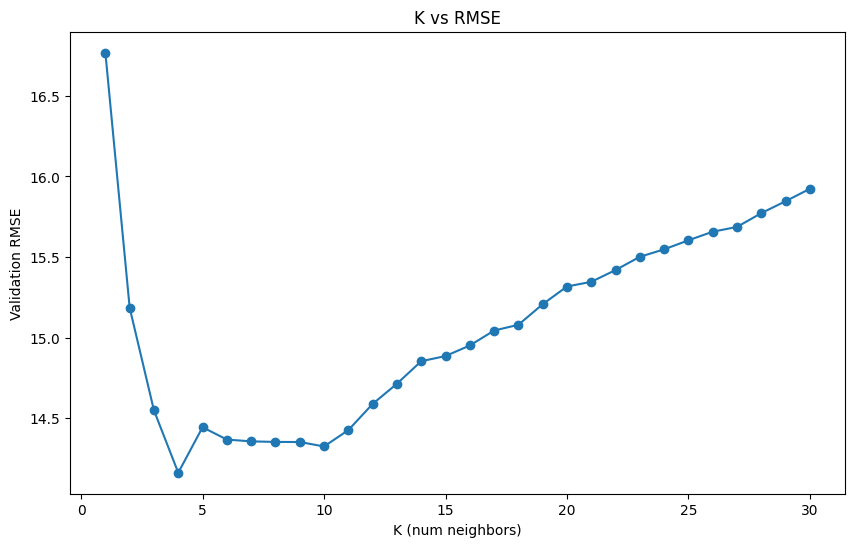

In [26]:
# Columns to keep. in this case we want everything but the categorical
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing (drop categorical), scaling, and knn
knn_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_no_cat(cols_2_keep)),  #keep vars
    ('scaler',scaler),   #scale
    ('model', knn_reg)
])

# Parameters of pipelines can be set using '__' separated parameter names:
#here we will consider the number of neighbors 
#use model__ since this is a model parameter
param_grid = {
    "model__n_neighbors": list(range(1, 31))
}

#performs the given cv (in our case repeated cv) for each hyperparamteer combo list in param_grid. 
#computes all metrics in scoring list. Ranks them by the refit parameter (in our case RMSE) 
search= GridSearchCV(estimator=knn_mod,  param_grid=param_grid, cv=rkf,scoring=scoring, refit='neg_root_mean_squared_error',n_jobs=-1)
search.fit(X_train, y_train)

#Print KNN Graphic
#convert to df
cv_results = pd.DataFrame(search.cv_results_)
  
# Plot max_features vs score
plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_model__n_neighbors'], -cv_results['mean_test_neg_root_mean_squared_error'], marker='o')
plt.xlabel('K (num neighbors)')
plt.ylabel('Validation RMSE')
plt.title('K vs RMSE')
plt.show()

### Select Final Hyperparameter and Record Results

In [27]:
#clone model for later use
knn_mod=search.best_estimator_
knn_mod=clone(knn_mod)

print("Grid Search Best Parameter (CV score=%0.3f):" % search.best_score_, search.best_params_)

primary_metric = 'neg_root_mean_squared_error'
#store results
all_results['knn_mod'] = slh.hypertuning_summary(search,scoring,primary_metric) 

#spit out resulting variables in regression
print('')
print('Parameters')
print(knn_mod[:-1].fit(X_train,y_train).get_feature_names_out())

Grid Search Best Parameter (CV score=-14.163): {'model__n_neighbors': 4}
params: {'model__n_neighbors': 4}
neg_root_mean_squared_error: -14.162523300614101
r2: 0.6877106204952933
neg_mean_absolute_error: -9.535547884430457

Parameters
['age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5']


## 13) Cart

In [28]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing (one hot encode), scaling, and knn
cart_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),  #keep vars and one hot encode
    ('model', cart_reg)
])

# Parameters of pipelines can be set using '__' separated parameter names:
#here we will consider the ccp_alpha 
#use model__ since this is a model parameter
param_grid = {
    "model__ccp_alpha": list(np.logspace(-6,6,20))
}

#performs the given cv (in our case repeated cv) for each hyperparamteer combo list in param_grid. 
#computes all metrics in scoring list. Ranks them by the refit parameter (in our case RMSE) 
search = GridSearchCV(estimator=cart_mod,  param_grid=param_grid, cv=rkf,scoring=scoring, refit='neg_root_mean_squared_error',n_jobs=-1)
search.fit(X_train, y_train)

#clone model for later use
cart_mod=search.best_estimator_
cart_mod=clone(cart_mod)

print("Grid Search Best Parameter (CV score=%0.3f):" % search.best_score_, search.best_params_)

primary_metric = 'neg_root_mean_squared_error'
#store results
all_results['cart_mod'] = slh.hypertuning_summary(search,scoring,primary_metric) 

#spit out resulting variables in regression
print('')
print('Predictors')
print(cart_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Grid Search Best Parameter (CV score=-13.330): {'model__ccp_alpha': np.float64(0.026366508987303555)}
params: {'model__ccp_alpha': np.float64(0.026366508987303555)}
neg_root_mean_squared_error: -13.329712800087929
r2: 0.7105656131837331
neg_mean_absolute_error: -5.091855537724158

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5']


## 14) Random Forest

In [29]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing (in this case one hot encoding) and randomforest
rf_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('model', rf_reg)
])

#first fit themodel
rf_mod.fit(X_train,y_train)

#the output to preprocessor is number of variable into th eRF
num_predictors = len(rf_mod['preprocessor'].get_feature_names_out())

# Parameters of pipelines can be set using '__' separated parameter names:
#here we will consider the number of predictors to split
param_grid = {
    "model__max_features": list(range(1, num_predictors + 1))
}

#performs the given cv (in our case repeated cv) for each hyperparamteer combo list in param_grid. 
#computes all metrics in scoring list. Ranks them by the refit parameter (in our case RMSE) 
search = GridSearchCV(estimator=rf_mod,  param_grid=param_grid, cv=rkf,scoring=scoring, refit='neg_root_mean_squared_error',n_jobs=-1)
search.fit(X_train, y_train)

#clone model for later use
rf_mod=search.best_estimator_
rf_mod=clone(rf_mod)

print("Grid Search Best Parameter (CV score=%0.3f):" % search.best_score_, search.best_params_)

primary_metric = 'neg_root_mean_squared_error'
#store results
all_results['rf_mod']=slh.hypertuning_summary(search,scoring,primary_metric) 

#spit out resulting variables in regression
print('')
print('Predictors')
print(rf_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Grid Search Best Parameter (CV score=-9.342): {'model__max_features': 14}
params: {'model__max_features': 14}
neg_root_mean_squared_error: -9.342251859293107
r2: 0.8642188411693735
neg_mean_absolute_error: -5.270493020587457

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5']


## 15) Boosting

In [30]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

# Create a pipeline with preprocessing (in this case one hot encoding) and gbm
gbm_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('model', gbm_reg)
])

#first fit themodel
gbm_mod.fit(X_train,y_train)

from scipy.stats import randint, loguniform, uniform

# Define the parameter distribution for the various hyperparameters
param_dist = {
    'model__n_estimators': randint(200, 2000) ,
    'model__learning_rate': loguniform(1e-4, .2) ,
    'model__max_depth': randint(1, 7),
    'model__subsample': uniform(0, 1) 
}

#run the randmo search cv
rnd_search = RandomizedSearchCV(estimator=gbm_mod,  param_distributions=param_dist,  n_iter=5, cv=rkf,
                                scoring=scoring, refit='neg_root_mean_squared_error', random_state=567, n_jobs=-1)
rnd_search.fit(X_train, y_train)

gbm_mod=rnd_search.best_estimator_
gbm_mod=clone(gbm_mod)

print("Random Search Best Parameter (CV score=%0.3f):" %  rnd_search.best_score_, rnd_search.best_params_)

primary_metric = 'neg_root_mean_squared_error'
#store results
all_results['gbm_mod']=slh.hypertuning_summary(rnd_search,scoring,primary_metric) 

#spit out resulting variables in regression
print('')
print('Predictors')
print(gbm_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Random Search Best Parameter (CV score=-8.670): {'model__learning_rate': np.float64(0.007848271096261121), 'model__max_depth': 3, 'model__n_estimators': 1881, 'model__subsample': np.float64(0.34501983632804634)}
params: {'model__learning_rate': np.float64(0.007848271096261121), 'model__max_depth': 3, 'model__n_estimators': 1881, 'model__subsample': np.float64(0.34501983632804634)}
neg_root_mean_squared_error: -8.670437843301
r2: 0.8830984742603977
neg_mean_absolute_error: -5.606348898547193

Predictors
['method_A' 'method_B' 'method_C' 'mixing_hand' 'mixing_machine'
 'mixing_ready' 'region_east' 'region_north' 'region_south' 'region_west'
 'age' 'cement' 'water' 'ash' 'slag' 'coarse' 'medium' 'fine' 'superfine'
 'admixtures' 'additive1' 'additive2' 'additive3' 'additive4' 'additive5']


# 16) Stacking Model

In [31]:
# Columns to keep. in this case we want everything
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

#1) Create base models
ela_stack = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

gbm_stack = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('model', gbm_reg)
])


# Step 2: Define base models
base_models = [
    ('gbm_stack', gbm_stack),
    ('ela_stack', ela_stack)
]

# Step 3: Define meta-model
meta_model = LinearRegression()

# Step 4: Create stacking pipeline
stacking_pipeline = Pipeline([
    ('model', StackingRegressor(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5,  # Cross-validation folds for meta-model training
        n_jobs=-1  # Use all available cores
    ))
])

#first fit themodel
stacking_pipeline.fit(X_train,y_train)

from scipy.stats import randint, loguniform, uniform

# Define the parameter distribution for the various hyperparameters
param_dist = {
    'model__gbm_stack__model__n_estimators': randint(200, 2000),
    'model__gbm_stack__model__learning_rate': loguniform(1e-4, 0.2),
    'model__gbm_stack__model__max_depth': randint(1, 7),
    'model__gbm_stack__model__subsample': uniform(0, 1),
    'model__ela_stack__model__l1_ratio': uniform(0, 1),
    'model__ela_stack__model__n_alphas': randint(1, 100)  # Changed to randint for integer values
}

#run the random search cv
rnd_search = RandomizedSearchCV(estimator=stacking_pipeline,  param_distributions=param_dist,  n_iter=5, cv=rkf,
                                scoring=scoring, refit='neg_root_mean_squared_error', random_state=567, n_jobs=-1)

rnd_search.fit(X_train, y_train)

stacking_mod=rnd_search.best_estimator_
stacking_mod=clone(stacking_mod)

print("Random Search Best Parameter (CV score=%0.3f):" %  rnd_search.best_score_, rnd_search.best_params_)

primary_metric = 'neg_root_mean_squared_error'
#store results
all_results['stacking_mod']=slh.hypertuning_summary(rnd_search,scoring,primary_metric) 

#spit out resulting variables in regression
print('')
print('Predictors')
#print(stacking_pipeline[:-1].fit(X_train,y_train).get_feature_names_out())


Random Search Best Parameter (CV score=-8.621): {'model__ela_stack__model__l1_ratio': np.float64(0.9223808602551151), 'model__ela_stack__model__n_alphas': 35, 'model__gbm_stack__model__learning_rate': np.float64(0.04293629393329877), 'model__gbm_stack__model__max_depth': 6, 'model__gbm_stack__model__n_estimators': 1283, 'model__gbm_stack__model__subsample': np.float64(0.3168430299826389)}
params: {'model__ela_stack__model__l1_ratio': np.float64(0.9223808602551151), 'model__ela_stack__model__n_alphas': 35, 'model__gbm_stack__model__learning_rate': np.float64(0.04293629393329877), 'model__gbm_stack__model__max_depth': 6, 'model__gbm_stack__model__n_estimators': 1283, 'model__gbm_stack__model__subsample': np.float64(0.3168430299826389)}
neg_root_mean_squared_error: -8.62127617807739
r2: 0.8846849837601085
neg_mean_absolute_error: -5.427654125920384

Predictors


# Final Model Comparison Using Cross-Validation RMSE

In [32]:
#Print final results of all models and sort by log loss
all_results_df = pd.DataFrame.from_dict(all_results, orient='index').sort_values(by='neg_root_mean_squared_error', ascending=False)
all_results_df = all_results_df.drop('params',axis=1)
print(all_results_df.to_string(index=True, header=True, line_width=2000))


                  neg_root_mean_squared_error        r2  neg_mean_absolute_error
stacking_mod                        -8.621276  0.884685                -5.427654
gbm_mod                             -8.670438  0.883098                -5.606349
rf_mod                              -9.342252  0.864219                -5.270493
lin_4_model                        -10.489175  0.829687                -8.054325
ela_5_mod                          -10.652297  0.824298                -8.108461
ela_4_mod                          -10.753968  0.820979                -8.175506
lin_cube_model                     -10.796381  0.819532                -8.290415
ela_cube_mod                       -10.903745  0.816151                -8.249147
lin_5_model                        -11.758380  0.785897                -8.793110
ela_quad_mod                       -11.845024  0.783330                -8.839225
lin_quad_model                     -11.906594  0.781144                -8.947472
ela_int_mod                 

# Final Model Selection (review results looking at training data only)

In [33]:
# Final Model: the GBM Model based off of RMSE
final_model = stacking_mod

#fit winning model
final_model.fit(X_train,y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)
 
# Evaluate the final model using RMSE
rmse_test = root_mean_squared_error(y_test, y_pred)
mean_pred = np.mean(y_pred)
std_pred = np.std(y_pred)
print(f'Test Set RMSE: {rmse_test}')


Test Set RMSE: 9.66027150376046


# Final Run using all training data and making prediction using test set data from test csv file

In [34]:
#Test results of final model are consitent with training data.  Confirmed gbm_model is sufficient to use.

# Final model fit on all of provided data
final_model.fit(X,y)

# Make predictions on the test set (Test / segregated data in seperate file)
y_final_pred = final_model.predict(TEST)


# Log Final Results/Predictions and print to CSV file

In [35]:
# Print Final Prediction to Prediction CSV File

final_results={'strength':y_final_pred}

final_results=pd.DataFrame(final_results)

final_results.to_csv('thompson_stucco_predictions.csv',index=False)